In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix 
from tensorflow import optimizers
import matplotlib.pyplot as plt
import seaborn as sns
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
print("GPU disponible: ", tf.config.list_physical_devices('GPU'))








1 Physical GPUs, 1 Logical GPUs
GPU disponible:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
test_dir = './Rock-Paper-Scissors/test/'
train_dir = './Rock-Paper-Scissors/train/'
validation_dir = './Rock-Paper-Scissors/validation/'

# Data Augmentation
sample_generator = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    rotation_range = 90,
    height_shift_range=0.2,
    width_shift_range=0.2
    
)
sample_images = sample_generator.flow_from_directory(
    train_dir,
    target_size=(300,300),
    color_mode='rgb',
    class_mode=None,
    batch_size=1,
    shuffle=True,
    seed=42
)

Found 2520 images belonging to 3 classes.


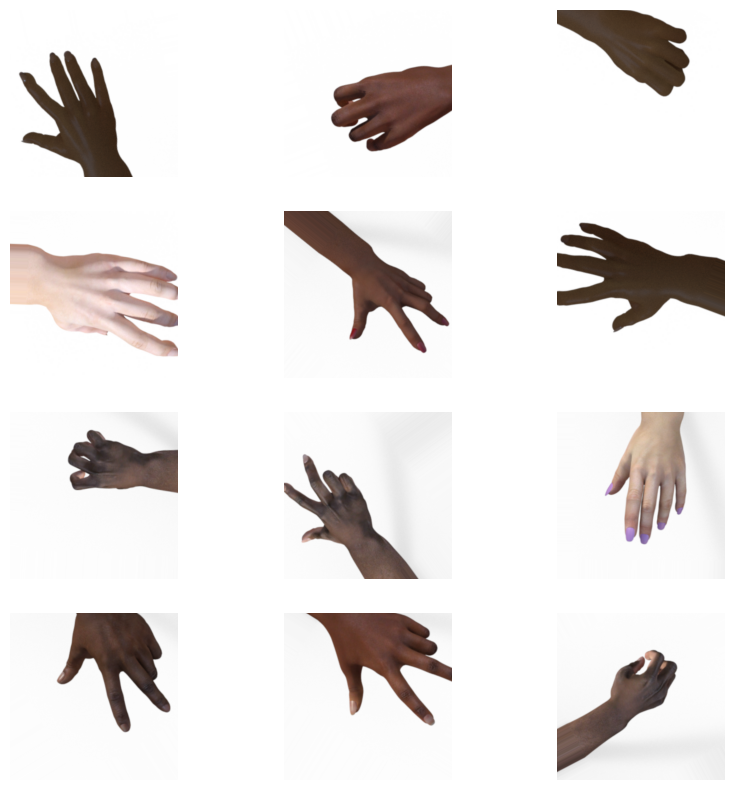

In [21]:
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(4,3,i+1)
    img = sample_images.next()[0]
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [22]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45,
    height_shift_range=0.1,
    width_shift_range=0.1,
    zoom_range=0.01
)

test_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.7
)

val_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.7
)

In [23]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

val_images = val_generator.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)


test_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)

Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 258 images belonging to 3 classes.


In [24]:
# Compilación y entrenamiento del modelo
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(300,300,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [25]:
# Compilación y entrenamiento del modelo
model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 73, 73, 128)       46592     
_________________________________________________________________
batch_normalization_10 (Batc (None, 73, 73, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 36, 36, 256)       819456    
_________________________________________________________________
batch_normalization_11 (Batc (None, 36, 36, 256)       1024      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 256)      

In [26]:
history = model.fit(
    train_images,
    epochs=100,
    validation_data=val_images,
    validation_freq=0.7,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=5,
            restore_best_weights=True
        )
    ])

Epoch 1/100
79/79 [==============================] - 30s 369ms/step - loss: 1.4873 - accuracy: 0.4123
Epoch 2/100
79/79 [==============================] - 29s 363ms/step - loss: 1.0949 - accuracy: 0.5369
Epoch 3/100
79/79 [==============================] - 29s 364ms/step - loss: 0.8420 - accuracy: 0.6282
Epoch 4/100
79/79 [==============================] - 29s 365ms/step - loss: 0.6689 - accuracy: 0.7198
Epoch 5/100
79/79 [==============================] - 29s 363ms/step - loss: 0.5632 - accuracy: 0.7615
Epoch 6/100
79/79 [==============================] - 29s 363ms/step - loss: 0.4967 - accuracy: 0.7952
Epoch 7/100
79/79 [==============================] - 29s 362ms/step - loss: 0.4159 - accuracy: 0.8317
Epoch 8/100
79/79 [==============================] - 29s 368ms/step - loss: 0.3712 - accuracy: 0.8567
Epoch 9/100
79/79 [==============================] - 29s 363ms/step - loss: 0.3146 - accuracy: 0.8821
Epoch 10/100
79/79 [==============================] - 29s 362ms/step - loss: 0.276

<Axes: >

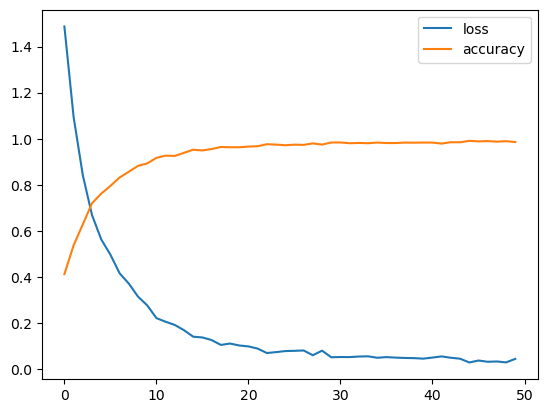

In [31]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [32]:
predictions = np.argmax(model.predict(test_images), axis=1)

In [34]:
from sklearn.metrics import classification_report


cm = confusion_matrix(test_images.labels,predictions,labels=[0,1,2])
clr = classification_report(test_images.labels,predictions,labels=[0,1,2],target_names=['Paper',"Rock","Scissors"])

In [35]:
_, accuracy = model.evaluate(test_images,verbose=0)
accuracy

0.8759689927101135

In [36]:
print(clr)

              precision    recall  f1-score   support

       Paper       0.90      0.72      0.80        86
        Rock       0.77      1.00      0.87        86
    Scissors       1.00      0.91      0.95        86

    accuracy                           0.88       258
   macro avg       0.89      0.88      0.87       258
weighted avg       0.89      0.88      0.87       258



Text(0.5, 1.0, 'Confusion Matrix')

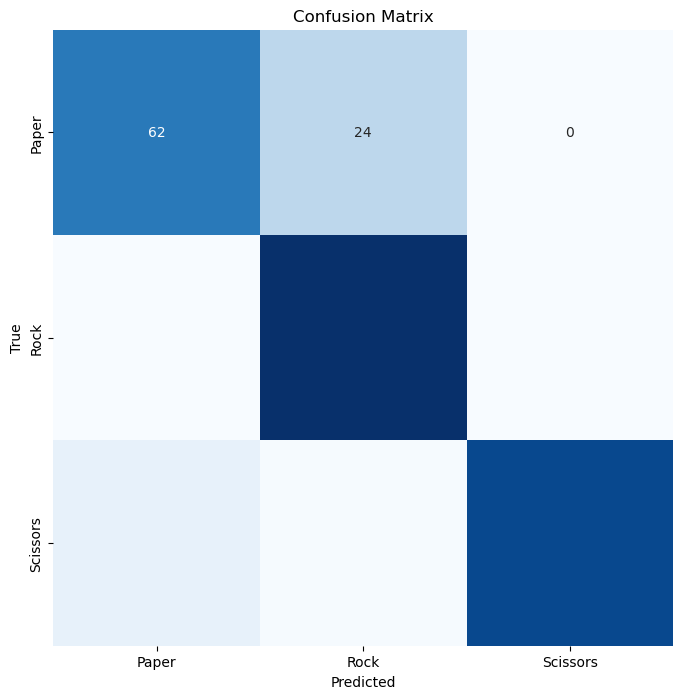

In [37]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap="Blues",cbar=False)
plt.xticks(ticks=[0.5,1.5,2.5], labels=["Paper","Rock","Scissors"])
plt.yticks(ticks=[0.5,1.5,2.5], labels=["Paper","Rock","Scissors"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")